<div style="text-align: center">
    <img src="./images/markdown//assets/uofg_blue.png" alt="PHYS5036" width="500">
    <p style="text-align: center;"><strong>Welcome to PHYS5036. </strong>
Detection and Analysis of Ionising Radiation
    </p>
</div>

In [26]:
# Importing the required modules

import matplotlib.pyplot as plt         # Common python package for plotting
import numpy as np                      # For many numerical operation (e.g. arrays, sine functions, maths constants)
import pandas as pd                     # Common python dataframe package used in industry and academia
from scipy.optimize import curve_fit    # Commonly used fitting package - has some tricky syntax but useful to learn to use.
import os                               # For getting current working directory

In [27]:
%pwd

'/workspaces/PHYS5036-labs'

# Attenuation of Gamma-Radiation in Matter

<span style="color:blue">Data collection</span> steps are typically indicated with a <span style="color:blue">blue</span> title.

<span style="color:red">Computational work</span> is indicated with a <span style="color:red">red</span> title.


The purpose of this experiment is to familiarise the student with the calibration of a scintillation counter by
observing gamma-ray spectra of several radioisotopes. This data will then be analysed and a Monte Carlo
simulation utilised to determine the factors describing gamma-ray attenuation in aluminium and lead.

**Absolute Determination Objectives:**
- Produce $\gamma$-ray spectra using a scintillation counter coupled to a multichannel analyser (MCA).
- Produce a calibration for a scintillation counter, taking into account any experimental uncertainties.
- Measure and identify unknown $\gamma$-emitting isotopes, taking the performance characteristics and any uncertainties evaluated into account.
- Calculate the relationship between energy resolution and the $\gamma$-ray energy for a scintillation counter.
- Use a Monte Carlo simulation to better understand detector systems and particle interactions.
- Combine simuation with experimental results to determinate the source activity.

Hints:
1. Save your data from K-Spect as .Spe file format.
2. All the data-taking for this experiment can be performed in two lab days with proper planning.
3. The code given in this notebook may be incomplete. Make sure you understand the limits and what you are expecting.

---

## <span style="color:red">Safety in the lab</span>

The experiment makes use of a scintillation counter, various radioactive sources and unvarnished lead bricks used for shielding. 

#### Handling radioactive sources  

- Any source removed from the safe **must** be done by one of the demonstators. You are required to sign out any source and **you** are responsible for it until it is returned to the safe. 
- Do not "lend" or give your source to a colleague when you are finished with it. Notify a demonstrator who can sign the source back in so it is available for anyone to use.
- Keep exposure to a minimum by handling sources quickly, thinking before handling the source and keeping sources as far away from you and anyone else as much as possible. 
    - If the source is not being used for a short time, the source should be put behind lead shielding provided. 
    - If the source is not being used for a extended time, it should be returned to the safe. This should be done by a demonstrator who can confirm the source is correctly returned.  
- Sources are wrapped, placed inside containers or have a protective shielding around them. **Do not tamper with the containers and shielding**.
- Replace the pen sources into the shielding container when not in use. 


#### Operating electronics

**Under no circumstances should the HV cables be removed without the lab head present**. Make sure you are happy with the setting before turning on the crate and the HV. Ensure you switch the equipment off properly at the end of the day. 

#### Handling Lead Bricks

They are heavy and can cause significant damage if dropped. Do not handle the lead bricks with bare hands. Nitrile (blue rubber) gloves are provided for handling lead bricks. Wash hands thoroughly after contact with lead.

#### General Rules

**Eating and drinking is strictly prohibited in the radiation laboratory**. Go into the corridor or stairwell if you need a snack or a drink. 

Further safety guidance can be found in the Radioactive Sources in Teaching Labs located on top of the source safe. Please also adhere to the general and specific lab safety guidelines found elsewhere. 

---

## Section 1 -  Background Theory
A Scintillation Detector operates by absorbing energy from fast-moving charged particles and generating a
large number of visible and ultraviolet photons. The number of photons generated is a measure of the energy
absorbed in the detector.
The scintillation material is optically coupled to a photomultiplier tube. Low-energy photons generated in the
scintillation material strike a photocathode at the entrance to the photomultiplier tube where they eject
electrons by the photoelectric effect. These electrons are accelerated in a high potential towards a series of
dynodes. At each dynode, the incident electrons release more electrons (about 3 to 5 each) and so the electron
flux multiplies. After 8 to 12 dynodes (depending on photomultiplier type) the avalanche of electrons is
detectable as a small negative electrical pulse. This is then amplified to give a typical pulse profile as shown
below. The main pulse (negative) is followed by a positive overshoot. It is important to analyse the first
portion of the pulse.

<div style="text-align: center">
    <img src="./images/markdown/pulse.png" alt="Typical pulse profile" width="600">
    <p style="text-align: center;"><strong>Figure 1:</strong> Typical pulse profile for a Sodium Iodide scintillation detector.</p>
</div>

### 1.1. Gamma-ray Interactions:

In this experiment the Scintillation Detector is used to detect gamma-rays emitted by a radioactive source. There are three primary processes by which the gamma-rays can interact with the scintillation material:

1. Photoelectric Effect
2. Compton Scattering
3. Pair Production (for gamma rays of energy >1.02 MeV)

#### Compton Scattering:

Compton Scattering is the purely kinematic collision of a gamma-ray and a loosely bound electron. The energies of the gamma-ray ($E_{\gamma'}$) and the electron after the collision depend only on the initial gamma-ray energy ($E_{\gamma}$) and the angle of deflection ($\theta$) of the gamma ray:

$$ 
E_{\gamma'} = \frac{E_\gamma}{1 + \frac{E_\gamma}{m_e c^2} \left( 1 - \cos\theta \right)}
$$

where $m_e$ is the electron mass and $c$ is the velocity of light. Thus, the maximum energy that can be transferred to the electron occurs when the photon is deflected through $180^\circ$.

#### Energy Deposited in the Scintillator: 

The amount of energy deposited in the scintillator depends on the interactions of the gamma-ray with the scintillator. The three most distinct features, observed in typical energy spectra, are:
1. All the energy of the incident gamma-ray is absorbed by the detector. This produces the Total Energy Peak (also called the Photo Peak) in a spectrum.

2. The gamma-ray Compton Scatters in the scintillator, and the scattered gamma-ray escapes from the crystal without any further interaction. In this case only the energy imparted to the Compton electron is absorbed. This gives rise to a distribution of energies up to the maximum allowed electron energy. The corresponding cut-off is called the Compton Edge because it is an edge, it is less easy to define its position than the Total Energy Peak.

3. The gamma-ray may Compton Scatter outside the scintillator and the scattered gamma-ray may then enter the scintillator and interact. This gives rise to a small Backscatter Peak where the energy of the photon corresponds to a deflection of 130° to 180°. It generally has very low intensity and sits on top of the Compton distribution. Its position is even harder to define experimentally than the Compton Edge.

<div style="text-align: center">
    <img src="./images/markdown/CS-137spectrum.png" alt="Annotated CS-137 spectrum" width="900">
    <p style="text-align: center;"><strong>Figure 2:</strong> Sodium Iodide spectrum for 137Cs. .</p>
</div>

---
## Section 2: Digitisation of the Detector Output Signal </span>


The raw output of the PMT or Germanium detector is an electrical pulse, the height of which is dependent
on the total energy deposited in the detector, while its shape is related to the time profile of the detector
material. In order to build up a spectrum of the energy deposited in the detector, the PMT output is
usually amplified and then the pulse height digitised in an Analogue-to-Digital Converter (ADC). 


### <span style="color:blue">2.1. Multi-Channel Analyser and Data Acquisition (DAQ) software</span>

The hardware set-up contains a multi-channel analyser (MCA) with an analogue to digital converter (ADC) that sorts input pulses from the scintillation counter by their amplitudes into 4096 channels (or bins). The MCA used in this experiment is capable or sorting pulses up to 10V.

The Maestro software is used to control the hardware and process this channel data. Ensure your MCA is set to 4096 channels.

The power supply has three channels, turn it on using the POWER button at the bottom left.<br>
<br>
Channel 1 — Detector: set to 25.5 V (<b>do not exceed 30 V</b>)<br>
Channel 2 — Pre-amp: set to 5.0 V<br>
Channel 3 — Adjustable: hold the CH3 button to set it and confirm the bottom-right LED reads 5 V

When you are happy with your settings, turn on the detector using the On/Off button. The display on the power supply should show CV under CH1 and CH2 (detector receiving voltage).

Start by inserting the Sr-90,Am-241,Cs-137 mixed source into the source holder in front of the detector.

After a few seconds, you should see tall amplified noise counts in the 0-100 channel range. Remove this by opening Acquire → MCB Properties and raising the Lower Level Discriminator (LLD) to just above that feature (typically 50–120 channels, detector-dependent). Ask for help if you need to cut off more than this. 

Clear your measurement and a sharp peak corresponding to the 662 keV photopeak of Cs-137 should now be visible. To keep all sources for this experiment within the available channel range, align this peak to roughly channel 1700 by increasing or decreasing the gain from the amplifier in the crate. Read the exact channel by clicking the spectrum and checking the Marker value.

**ASK A DEMONSTRATOR BEFORE ADJUSTING THE VOLTAGE** 

Clear and restart the acquisition to see the effect of any changes. Once you are satisfied, do not change the high voltage or amplifier gain further for the remainder of the experiment.

Now obtain a spectrum for Cs-137 and save the file in ASCII SPE format. If you are using this notebook, upload to JupyterHub to an appropriatly named folder. 


All measurements of this type are affected by background signals due to factors such as electronic noise and cosmic radiation. To obtain a true energy spectrum arising from just the source radiation, you will also need a background measurement taken the same day as your source data. The background spectrum will be subtracted from each source spectrum.

### <span style="color:blue">2.2. Acquisition time and Poisson statistics. </span>


Radiation counts follow Poisson statistics. The fractional (relative) statistical uncertainty of $\varepsilon$ on a measured peak area, can be described as
$$
\varepsilon \approx \frac{1}{\sqrt{N}}
$$

where $N$ is the net counts in the peak after background subtraction. So in order to get a 10% measurement, for example, we need N = 100 counts.

General tips:
- Pick a target fractional uncertainty for key measurements
- If background is non-neglibible, aim for more counts than this 
- Ensure backrgound measurement will be at least as long as each source run, longer will help reduce background uncertainties. 
- You can estimate counts using the peak, or use the region-of-interest (ROI) feaure in the acquisition software to check the integrated peak counts in that region.

### <span style="color:red">2.3. Analysis introduction </span>

Below you will find a function made to read in the .spe files and return a data frame for use in analysis. Please read through it in order to understand its function, but you are not expected to edit this.

In [28]:
## The code below extracts the data from your .spe files and returns it as a pandas dataframe.
## you are not expected to edit this - but feel free to make changes if you are confident.

def extract_data(filename):
    """Extracts channel range, counts, and measurement times from .spe file"""
    start = end = None
    counts = None
    livetime = realtime = None
    
    with open(filename, "r") as f:
        lines = f.readlines()
    i = 0
    while i < len(lines):
        line = lines[i].strip()
        if line == "$MEAS_TIM:":
            # Extract measurement times (from header. Syntax: livetime, realtime)
            livetime, realtime = map(float, lines[i+1].split())
        elif line == "$DATA:":
            # Extract channel start and end (from header)
            start, end = map(int, lines[i+1].split())
            nochannels = end - start + 1
            # Read channel values 
            block = lines[i+2:i+2+nochannels]
            counts = np.array([int(x.strip()) for x in block], dtype=int)
        i += 1
    return start, end, counts, livetime, realtime


def read_spe_files(data_file, background_file, bin_num=4096):
    # Extract data and background 
    data_start, data_end, yield1, data_livetime, data_realtime = extract_data(data_file)

    if background_file is None:
        # No background file provided - return data only
        print("No background file provided - returning data only. Please ensure you have accounted for background in your analysis!")
        channel = np.arange(data_start, data_end + 1, dtype=int)
        error1 = np.sqrt(yield1.astype(float))
        df = pd.DataFrame({
            "channel": channel,
            "data": yield1,
            "err_data": error1,
        })
        return df
    
    else:
        bg_start, bg_end, yield2, bg_livetime, bg_realtime = extract_data(background_file)

        # check that they are the same length
        if (data_start, data_end) != (bg_start, bg_end):
            raise ValueError("data and background files have different channel ranges!")

        # Background-subtracted counts (scaled by uptime)
        yield3 = yield1 - yield2*(data_livetime/bg_livetime) 

        # Channels
        channel = np.arange(data_start, data_end + 1, dtype=int)

        # Poisson errors
        error1 = np.sqrt(yield1.astype(float))
        error2 = np.sqrt(yield2.astype(float))
        error3 = np.sqrt(yield1 + yield2*(data_realtime/bg_realtime))

        # Assemble into a DataFrame
        df = pd.DataFrame({
            "channel": channel,
            "data": yield1,
            "err_data": error1,
            "background": yield2,
            "err_background": error2,
            "data_bgsubtracted": yield3,
            "err_data_bgsubtracted": error3,
        })

        # Rebin if requested. I.e. if bin_number = 512, rebin to 512 channels
        if bin_num is not None:
            if bin_num not in [512, 1024, 2048, 4096, 8192, 16384]:
                raise ValueError("bin_num must be one of [512, 1024, 2048, 4096, 8192, 16384]")
            if (data_end - data_start + 1) % bin_num != 0:
                raise ValueError(f"Cannot rebin to {bin_num} channels - original number of channels is {data_end - data_start + 1}, which is not a multiple of {bin_num}")
            rebin_factor = (data_end - data_start + 1) // bin_num
            df_rebinned = df.groupby(df.index // rebin_factor).sum().reset_index(drop=True)
            df_rebinned["channel"] = np.arange(bin_num)
            df = df_rebinned

        return df

Upload your saved Caesium-137 and backrgound measurements to an appropriate folder and edit the code below.

The code below shows how to read in the files with the above function (`read_spe_files`) and some simple analysis methods to get your started.

Edit the code below to plot the Cs-137 data you just recorded. 

In [29]:
# example of using the read in function

# print current folder from os
print(f"Current working folder: {os.getcwd()}, make sure to set path relative to this")

# set file paths here to YOUR OWN files
data_file = "cs137mix.spe"
background_file = "background.spe"

# define our pandas data frame by reading in the spe files
df_source = read_spe_files(data_file, background_file) 

# show a few lines of the dataframe to check it looks OK and view the column names 
df_source[40:50]


Current working folder: /workspaces/PHYS5036-labs, make sure to set path relative to this


,channel,data,err_data,background,err_background,data_bgsubtracted,err_data_bgsubtracted
40,40,145,12.041595,22,4.690416,136.016230,12.410492
41,41,168,12.961481,18,4.242641,160.649643,13.243121
42,42,154,12.409674,19,4.358899,146.241289,12.719681
43,43,160,12.649111,18,4.242641,152.649643,12.937552
44,44,177,13.304135,19,4.358899,169.241289,13.593759
45,45,169,13.000000,19,4.358899,161.241289,13.296250
46,46,137,11.704700,12,3.464102,132.099762,11.913025
47,47,137,11.704700,27,5.196152,125.974464,12.168418
48,48,152,12.328828,11,3.316625,147.508115,12.510402
49,49,178,13.341664,13,3.605551,172.691409,13.539948


Below we show a very simple method to plot a column of the dataframe and how to select a subset.

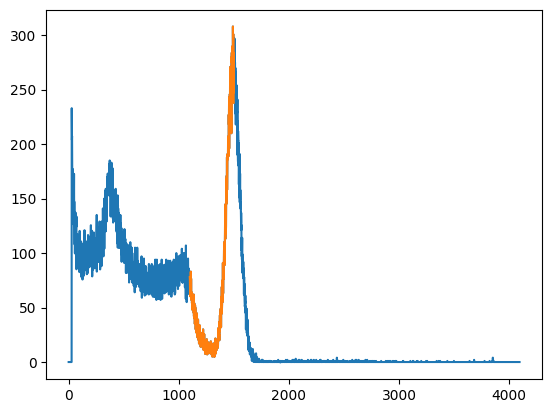

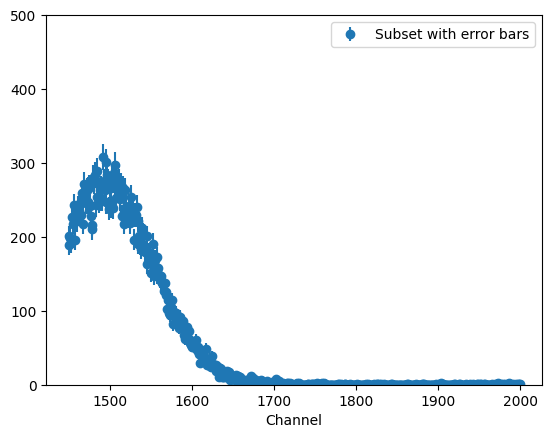

In [48]:
# Simple plot of the data and how to select a subset
plt.plot(df_source["channel"],df_source["data_bgsubtracted"])
plt.plot(df_source["channel"][1100:1500],df_source["data_bgsubtracted"][1100:1500]) # only plot channels 1200:1999
plt.show()

# Alternate way using variables to define the range with some extra features 
# Plotting just chosen range, but with error bars
min, max = 1450, 2000 
plt.errorbar(df_source["channel"][min:max], df_source["data_bgsubtracted"][min:max], yerr=df_source["err_data_bgsubtracted"][min:max], fmt='o', label='Subset with error bars')
plt.xlabel('Channel')
plt.ylim(0, 500)
plt.legend()
plt.show()

Questions:
>- Can you name the features shown in the spectrum?
>- Is the data taking up the full channel range, if not why?

#### <span style="color:red">Analysis: Energy Calibration</span>
In order to calibrate the detectors, we will need to find the relationship between the known energy of the different gamma-ray photopeaks and the corresponding measured ADC channel. 

The aim of this section is to performing fits to the main photopeaks and fill in the table below. Some of the values in this table will be needed later in the analysis.

### **Photopeak data**  

| Source  | Peak channel | Error (ch) | Peak σ (ch) | Error | Integral (counts) | Error |  
|---------|--------------|------------|-------------|-------|-------------------|-------|  
| Am-241  |              |            |             |       |                   |       |  
| Co-60   |              |            |             |       |                   |       |  
| Co-60   |              |            |             |       |                   |       |  
| Cs-137  |              |            |             |       |                   |       |  
| Cs-137  |              |            |             |       |                   |       |
| Na-22   |              |            |             |       |                   |       |
| Na-22   |              |            |             |       |                   |       | 



To do this as accurately as possible, the photopeaks must be fitted with a function that describes both the background under the photo peak and the peak itself. 
Consider the shape of the photopeak and how you can use this knowledge to fit an appropriate model and extract its parameters. Note that the uncertainty on the peak position is required. 

Ask the demonstrators if you are unsure and need some pointers. 

In [31]:
# Write a function to model a Gaussian peak + polynomial background. An example of writing a fit function is shown below for a polynomial background.

def polybackground(x,const,lin,quad):
    background = const+lin*x+quad*x*x
    return background

def peakfit():
    return peak
        
def signalFit():
    return peak+background

def doubleSignalFit():
    return peak1 + peak2 + background

In [32]:
# Plot the photopeak region of Cs-137 and perform a fit to the data here


At this stage, check with a demonstrator that your code is correct and that you have obtained a reasonable value for Cs-137.

Now repeat this procedure. Note the shape of the photopeaks of Co-60 and how you should adapt your model to reflect this.

Questions:
>- When fitting the photo peak, which fitting function is recommended—Gaussian, Lorentzian, or something else?
>- How do you identify multiple peaks in the spectrum if they overlap?

### <span style="color:red">2.3 Energy calibration fitting</span>

It is important to properly calibrate the readouts from the detector so that the spectra obtained can be expressed as a function of energy (rather than of channel numbers, which are somewhat arbitrary and very dependent on equipment, settings, etc.).

Using the table of known photopeak energies below:
- create an energy calibration graph of photopeak energy as a function of channel number. 
- Consider what type of function you think would best represent the relationship.  
- If you are unsure, consider creating a scatter plot of your data. 

You should take into account the error on your photopeak measurements but, for the purposes of this lab, the photopeak energies quoted below can be assumed to have no uncertainty. 

<table border="1" cellspacing="0" cellpadding="4" style="margin-left:auto; margin-right:auto; border-collapse: collapse;">
  <tr>
    <th>Isotope</th>
    <th>Photopeak (keV)</th>
  </tr>
  <tr>
    <td>Am-241</td>
    <td>59.5</td>
  </tr>
    <tr>
    <td rowspan="2">Co-60</td>
    <td>1172</td>
  </tr>
  <tr>
    <td>1333</td>
  </tr>
  <tr>
  <tr>
    <td>Cs-137</td>
    <td>662</td>
  </tr>
  <td rowspan="2">Na-22</td>
    <td>511</td>
  </tr>
  <tr>
    <td>1275</td>
  </tr>
</table>

>- How do we get the uncertainty in Energy based on the uncertainty in channel number?

In [33]:
# Space for analysis code

---


## <span style="color:red">Section 3 - Determination of unknown sources</span>

In real-life, measurements like this can be used to help determine the presence of unknown radioactive sources based on their characteristics discussed in this lab. 

Using the same method as before:
- take measurements for the "unknown" sources labelled A1145 and 1270, 
- find the channel number of their photopeak (or photopeaks) and 
- use your energy calibration curve to determine the photopeak energies. 

Use the table below to help determine what you think the unknown sources are, justifying your answer. When more than one peak is present in the spectrum, the relative intensities of the photopeaks may provide additional information to help your identification.


<table border="1" cellspacing="0" cellpadding="4" style="margin-left:auto; margin-right:auto; border-collapse: collapse;">
  <tr>
    <th>Isotope</th>
    <th>Half-life (T<sub>1/2</sub>)</th>
    <th>γ-ray Energy (keV)</th>
    <th>Relative Intensity (%)</th>
  </tr>
  <tr>
    <td rowspan="6">Am-241</td>
    <td rowspan="6">433 years</td>
    <td>14</td><td>13.5</td>
  </tr>
  <tr><td>18</td><td>21.0</td></tr>
  <tr><td>21</td><td>5.0</td></tr>
  <tr><td>26</td><td>2.5</td></tr>
  <tr><td>60</td><td>35.3</td></tr>
  <tr><td>32–38</td><td>8.0</td></tr>

  <tr>
    <td>Cs-137</td>
    <td>30.1 years</td>
    <td>662</td><td>85.1</td>
  </tr>

  <tr>
    <td rowspan="7">Ba-133</td>
    <td rowspan="7">10.8 years</td>
    <td>30–36</td><td>123</td>
  </tr>
  <tr><td>80</td><td>2.4</td></tr>
  <tr><td>81</td><td>33.8</td></tr>
  <tr><td>276</td><td>7.1</td></tr>
  <tr><td>303</td><td>18.7</td></tr>
  <tr><td>356</td><td>61.9</td></tr>
  <tr><td>384</td><td>8.9</td></tr>

  <tr>
    <td>Cd-109</td>
    <td>453 days</td>
    <td>88</td><td>100</td>
  </tr>

  <tr>
    <td rowspan="3">Co-57</td>
    <td rowspan="3">270.5 days</td>
    <td>14</td><td>9.4</td>
  </tr>
  <tr><td>122</td><td>85.2</td></tr>
  <tr><td>136</td><td>11.1</td></tr>

  <tr>
    <td rowspan="2">Co-60</td>
    <td rowspan="2">5.27 years</td>
    <td>1173</td><td>99.86</td>
  </tr>
  <tr><td>1333</td><td>99.98</td></tr>

  <tr>
    <td rowspan="2">Na-22</td>
    <td rowspan="2">2.60 years</td>
    <td>511</td><td>181</td>
  </tr>
  <tr><td>1275</td><td>99.95</td></tr>
</table>


Questions:
>- How closely do the measured energies need to match tabulated gamma energies to confidently identify a source?
>- What should we do if our measured peak energy falls between two known gamma lines?
>- Are there common gamma sources that show up as background contaminants in the lab?

In [34]:
# Space for analysis code

---


## <span style="color:red">Section 4 - Resolution of the Detector</span>


At this stage you should compute the Full Width Half Maximum (FWHM) for each of the photopeaks. This can be obtained by multiplying the standard deviation of the photopeak by 2.355 (specifically $2\sqrt{2ln2}$). The uncertainty in the FWHM should also be obtained. 

The finite width of the observed photopeaks is a result of the same energy deposit in a detector not giving the same pulse height for successive measurements. This is because there is an intrinsic variation in the number of (in this case) optical scintillation photons, subject to the familiar counting statistics rules. The spread is proportional to $\sqrt{N}$, where $N$ is the total number of optical scintillation photons for a given energy deposit. It is not possible to reliably simulate a detector system without first determining how this resolution varies with the energy of the incident radiation.

The resolution of a photopeak is defined as:

$$
R = \frac{\text{FWHM of Peak}}{\text{Peak Value}} = k E^n
$$


Where $E$ is the photopeak gamma-ray energy and $k,n$ are constants. 

Using your energy calibrated values:
- Find the resolution for each of the photopeaks. 
- Plot your resolution values as a function of photopeak energy. 
- Using the equation above, determine values for $k,n$. Consider also if there are any mathematical operations that can be applied to the equation to make the resulting model easier to fit. 

Questions:
>- What does the extracted value of $n$ tell you about the operation of this type of scintillation detector?
>- How does your extracted $n$ comapre to the expected value? What does this suggest?

In [35]:
# Space for analysis code

---
## <span style="color:blue">Section 5 - Absorption of Gamma Radiation</span>

The intensity of gamma radiation decreases exponentially as it passes through an absorber, described by Lambert’s Law of Absorption:
$$
I(x) = I_0 e^{−\mu x}
$$
where $I_0$ is the initial intensity, $I(x)$ is the transmitted intenstiy after absorber thickness x,  and $\mu$ is the linear attenuation coefficientfor the absorbing material. 
The half-value depth, $d_½$, is the thickness of the absorbing material that will reduce the original intensity by half.


- Derive a formula for $d_½$, expressing it in terms of $\mu$
- Determine the linear attenuation coefficient,$\mu$, and thus $d_½$, for aluminium and lead at different $\gamma$-radiation energies.
- Make suitable measurements using at least four different thicknesses of both aluminium and lead **(make sure to use the blue nitrile (rubber) gloves when handling lead)**. Think about how you can use the information about the photopeak to get the intesnsity. Check with a demonstrator if you are unsure.
- Discuss the dependence of $\mu$ and $d_½$ on energy and material. Compare with standard values.
- Sometimes linear absorption coefficients are expressed in units of $cm^2g^{-1}$. Discuss why this is appropriate and how the conversion between this and $cm^{-1}$ is made.

#### Task: Measure the linear attenuation coefficients, $\mu$

Measure $\mu$ and half-value depth $d_½$ for aluminium, steel, and lead at 2 different $\gamma$-ray energies.

Hints:
- Use the table known photopeak energies from before and your experience of counting rates to suggest suitable sources for this measurement.
- Use at least four different absorber thicknesses per material, chosen to span a sufficient range of transmission.
- Ensure background subtraction is applied when extracting peak counts.
- Plan measurement times so that statistical uncertainties remain reasonable even at higher absorber thicknesses - all measurements must be the same duration for this section.
- Intensity can be determined by integraintg the counts under the peak


>- How do attenuation coefficients vary with absorber material and photon energy?
>- In what practical contexts (e.g. shielding design, medical physics, nuclear safety) is this knowledge applied?

In [36]:
# Space for analysis code

---
## <span style="color:red">Section 5 - Simulation: Activity Determination with a Monte Carlo Simulation</span>


Extracting absolute physical quantities such as activities and cross sections is one of the most difficult type of
measurement. This is because absolute physical quantities require the knowledge of the absolute efficiency of
the detector system or other measuring apparatus. This efficiency depends on a large number of different
factors. 
>- What do you think some of these factors are?

The only means of determining this efficiency with any accuracy is to have a detailed simulation of the experiment. This must accurately reflect the geometry of the experimental set-up as well as the interactions of the gamma-rays in the different materials present. 

A numerical simulation based upon Monte Carlo techniques is therefore employed in this experiment.

*Research how these type of numerical methods are used to simulate the interaction of radiation with matter
and therefore the response of detectors.*

#### 5.1. Getting started:
First follow the steps in the “First Computing Set Up Steps” document, found on the Lab Moodle page, under
the Lab Material$\rightarrow$Computing section. It provides some useful introductory reading for using the School’s
computing.
Once you are happy with that document, log into JupyterHub in the normal way (remember if you are
working remotely, you will need to first connect via VPN).

https://jupyter.physics.gla.ac.uk/hub/login

Then follow the simulation environment set up instructions in Section 5 of the “Experiment Computing Set
Up” document from on the Lab Moodle page, under the Lab Material$\rightarrow$Computing section.
If you have any questions during this setup stage speak to the lab staff, who are happy to help you.
When we execute the command 
```
bash /local/cern/software/Sim/SimSetup.sh
```

during step 5 of the Experiment Computing Set Up, we are telling your Unix environment how to find the relevant simulation code. 
This is a Geant4 particle transport Monte Carlo simulation called SodiumIodideMC which has been designed
specifically for this laboratory. The simulated set up is shown in Figure 3.
<div style="text-align: center">
    <img src="./images/markdown/GEANTpic.png" alt="Typical pulse profile" width="600">
    <p style="text-align: center;"><strong>Figure 3:</strong> Left shows a sodium iodide scintillation counter in the lab. Right shows a simulation of the detector.
detector.</p>
</div>

<span style="color:red">Advanced:</span> *For students interested in the Geant4 software details, the C++ class definition files can be found
on Moodle in the Computing section, in a folder called “SodiumMC Source Code.” Have a look at the folders
and files inside. The class implementation files are in SodiumIodideMC/src/ subdirectory. Have a look through
these classes if you are curious how the C++ code for a Geant4 simulation is run and ask if you have any
questions or if you would like someone to explain it to you.*


#### <span style="color:blue">5.2. Run the simulation</span>
The simulation should be run four times to simulate the measurements that were taken in the lab during the
energy calibration with the four different radioactive sources. This is done by running the following commands
in the terminal:
```
cd ~/data
runSodiumIodide.py [sourcename];
```
where [sourcename] can be Am241, Na22, Cs137 or Co60 (remember unix is case sensitive). 

Note that a simulated background file is also generated. The output files will be written into the data folder. You can run the simulation elsewhere if you prefer, but please note that the data files will always be created in the same folder which the simulation is executed from.




#### <span style="color:red">5.3. Analyse the simulated spectra</span>

Once you have ran all four source simulations (it can take a while), plot the simulated spectra for the four sources. You should be able to use the analysis method that you previously used for experimental data for the analysis of simulated data. 

>- How well do they agree with your experimental data? 
>- Are there any significant differences?
